# 第13回

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("./titanic/train.csv", index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [139]:
def preprocess(_df):
    x = _df.drop(["Name", "Ticket", "Sex", "Cabin", "Embarked"], axis=1)
    x = pd.concat([
        x,
        pd.get_dummies(_df["Embarked"].fillna("U"), prefix="Embarked"),
    ], axis=1)
    if "Survived" in x:
        x = x.drop(["Survived"], axis=1)
    if "Embarked_U" in x:
        x = x.drop(["Embarked_U"], axis=1)
    x["Sex"] = _df["Sex"].astype("category").cat.codes
    x["Age"] = _df["Age"].fillna(_df["Age"].mean())
    x["Fare"] = _df["Fare"].fillna(_df["Fare"].mean())
    x["Fare1"] = x["Fare"] / (_df["SibSp"] + _df["Parch"] + 1)
    return x

In [140]:
Y = df["Survived"]
X = preprocess(df)
X

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex,Fare1
PassengerId,,,,,,,,,,
1,3,22.000000,1,0,7.2500,0,0,1,1,3.62500
2,1,38.000000,1,0,71.2833,1,0,0,0,35.64165
3,3,26.000000,0,0,7.9250,0,0,1,0,7.92500
4,1,35.000000,1,0,53.1000,0,0,1,0,26.55000
5,3,35.000000,0,0,8.0500,0,0,1,1,8.05000
...,...,...,...,...,...,...,...,...,...,...
887,2,27.000000,0,0,13.0000,0,0,1,1,13.00000
888,1,19.000000,0,0,30.0000,0,0,1,0,30.00000
889,3,29.699118,1,2,23.4500,0,0,1,0,5.86250


In [141]:
import seaborn as sns

<AxesSubplot:>

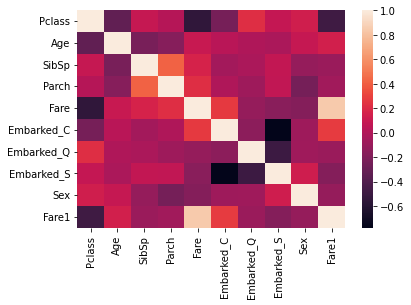

In [142]:
sns.heatmap(X.corr())

In [143]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

trans = MinMaxScaler()
trans.fit(X_train)

X_train_trans = trans.transform(X_train)
X_test_trans = trans.transform(X_test)

model = LogisticRegression()
model.fit(X_train_trans, Y_train)

print(f"train: {model.score(X_train_trans, Y_train)}")
print(f"test: {model.score(X_test_trans, Y_test)}")
print(f"係数: {model.coef_}")
print(f"切片: {model.intercept_}")

train: 0.8098802395209581
test: 0.7668161434977578
係数: [[-1.86986332 -1.67785797 -1.12075129 -0.76591113  0.23680778  0.27890125
  -0.06356848 -0.40644585 -2.64735065  0.16642125]]
切片: [3.25388352]


In [145]:
from sklearn.preprocessing import PowerTransformer

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

trans = PowerTransformer(method="yeo-johnson")
trans.fit(X_train)

X_train_trans = trans.transform(X_train)
X_test_trans = trans.transform(X_test)

model = LogisticRegression()
model.fit(X_train_trans, Y_train)

print(f"train: {model.score(X_train_trans, Y_train)}")
print(f"test: {model.score(X_test_trans, Y_test)}")
print(f"係数: {model.coef_}")
print(f"切片: {model.intercept_}")

train: 0.8278443113772455
test: 0.7443946188340808
係数: [[-0.84339843 -0.48113494  0.18898132  0.36329028 -0.85237037 -0.07025221
   0.02183971 -0.17887344 -1.3700716   1.04152008]]
切片: [-0.71992795]


In [147]:
df_test = pd.read_csv("./titanic/test.csv")

In [148]:
X_test = preprocess(df_test.iloc[:, 1:])

<AxesSubplot:>

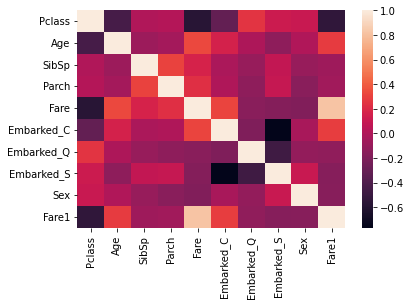

In [149]:
sns.heatmap(X_test.corr())

In [150]:
X_test.isna().max(axis=0)

Pclass        False
Age           False
SibSp         False
Parch         False
Fare          False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
Sex           False
Fare1         False
dtype: bool

In [151]:
Y_pred = model.predict(trans.transform(X_test))
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [152]:
submission = pd.concat([df_test["PassengerId"], pd.DataFrame(Y_pred, columns=["Survived"])], axis=1)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [153]:
submission.to_csv("submission.csv", index=False)